In [1]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [2]:
from utils import get_llm, draw_graph

In [3]:
class MyState(MessagesState):
    usr_msg: str

In [4]:
llm = get_llm()
def say_hi(state: MyState):
    response = llm.invoke(state['usr_msg'])
    return {"messages": [response]}


In [5]:
message_graph = StateGraph(MyState)
message_graph.add_node("llm_hi", say_hi)
message_graph.set_entry_point("llm_hi")
message_graph.set_finish_point("llm_hi")


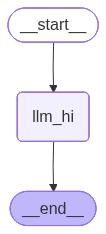

In [6]:
no_mem_graph = message_graph.compile()
no_mem_graph

In [7]:
response = no_mem_graph.invoke({'messages': [], 'usr_msg': "What is capital of India?"})

In [8]:
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 9, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0004040576879762941, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--49786fc9-31d9-46a8-8505-a64b3598f57b-0', usage_metadata={'input_tokens': 6, 'output_tokens': 9, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is capital of India?'}

In [9]:
response = no_mem_graph.invoke({'messages': [], 'usr_msg': "What is capital of US?"})

In [10]:
response

{'messages': [AIMessage(content='The capital of the United States is **Washington, D.C.**', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 14, 'total_token_count': 20, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 14}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.026071456926209585, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--9249f90c-7c15-4ac4-9c32-4c2c236abfc1-0', usage_metadata={'input_tokens': 6, 'output_tokens': 14, 'total_tokens': 20, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is capital of US?'}

In [11]:
from langgraph.checkpoint.memory import InMemorySaver

In [12]:
inmem_checkpointer = InMemorySaver()

In [13]:
inmem_graph = message_graph.compile(checkpointer=inmem_checkpointer)

In [14]:
# configuring thread
from langchain_core.runnables import RunnableConfig
config: RunnableConfig = {"configurable": {"thread_id": "1"}}

In [15]:
response = inmem_graph.invoke({'messages': [], 'usr_msg': "What is capital of India?"},config=config)

In [16]:
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 9, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0004040576879762941, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--e2755c96-b3c8-4367-a786-8dfd255625a8-0', usage_metadata={'input_tokens': 6, 'output_tokens': 9, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is capital of India?'}

In [17]:
response = inmem_graph.invoke({'usr_msg': "What is capital of US?"},config=config)

In [18]:
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 9, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0004040576879762941, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--e2755c96-b3c8-4367-a786-8dfd255625a8-0', usage_metadata={'input_tokens': 6, 'output_tokens': 9, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}}),
  AIMessage(content='The capital of the United States is **Washington, D.C.**', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'cand

In [19]:
list(inmem_graph.get_state_history(config))

[StateSnapshot(values={'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 9, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0004040576879762941, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--e2755c96-b3c8-4367-a786-8dfd255625a8-0', usage_metadata={'input_tokens': 6, 'output_tokens': 9, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}}), AIMessage(content='The capital of the United States is **Washington, D.C.**', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_to

In [20]:
from langgraph.checkpoint.sqlite import SqliteSaver

In [30]:
import sqlite3
conn = sqlite3.connect("testing.sqlite",check_same_thread=False)
sqlite_checkpointer = SqliteSaver(conn)

In [31]:
sqlite_mem_graph = message_graph.compile(checkpointer=sqlite_checkpointer)

In [32]:
from langchain_core.runnables import RunnableConfig
config: RunnableConfig = {"configurable": {"thread_id": "3"}}

In [33]:
response = sqlite_mem_graph.invoke({'usr_msg': "What is capital of India?"},config=config)
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 9, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0004040576879762941, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--555fd997-5c82-4248-943b-51e4bea9dc52-0', usage_metadata={'input_tokens': 6, 'output_tokens': 9, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is capital of India?'}

In [34]:
response = sqlite_mem_graph.invoke({'usr_msg': "What is capital of US?"},config=config)
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 9, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0004040576879762941, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--555fd997-5c82-4248-943b-51e4bea9dc52-0', usage_metadata={'input_tokens': 6, 'output_tokens': 9, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}}),
  AIMessage(content='The capital of the United States is **Washington, D.C.**', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'cand